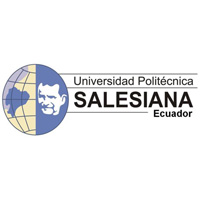

# Simulación

### Introducción y Reglas del Juego

El juego de la vida se desarrolla sobre un tablero cuadriculado o rejilla que en principio se presupone que es infinito. Evidentemente, en la práctica eso no puede ser, pero basta con hacerlo suficientemente grande. Cada casilla de ese tablero puede estar libre u ocupada. Estos dos estados se suelen distinguir con distintos colores. Cada casilla de este tablero está pues rodeada a su vez por otras 8 casillas o celdas. Yo las llamaré células de ahora en adelante.

Este “juego” es un juego de cero jugadores, lo que significa que no es necesaria la interacción de ninguna persona, ya que su desarrollo está determinado por la configuración inicial.

El juego se desarrolla por turnos: en cada turno se examinan todas las casillas del tablero y se calcula cual será su estado en el siguiente turno (también denominado generación). Finalmente, cuando ya se han calculado todos los estados, se actualiza el tablero.

El estado que tendrá una casilla en el siguiente turno se calcula siguiendo 3 reglas muy simples (como casi todos los juegos de Conway) pero que, sorprendentemente, pueden dar lugar a situaciones de enorme complejidad:


- Si una casilla está ocupada y el número de casillas adyacentes también ocupadas es menor que 2, la célula muere por aislamiento y se retira del tablero en la siguiente generación.

- Si una casilla está ocupada y el número de células que la rodean es mayor que 3, la célula muere por superpoblación (se quita del tablero en el siguiente turno).

- Una casilla libre que tenga 3 (y sólo 3) células adyacentes da lugar a una célula viva en el siguiente turno.

Estas tres simples reglas conforman un sistema caótico: cambiar una simple célula de estado puede hacer que la configuración desaparezca (tablero vacío), a que viva indefinidamente como una configuración oscilante o incluso cosas más interesantes.

## Codigo a Implementarse en Python

In [150]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [151]:
def exten(mat):
    n = len(mat)
    ex  = np.zeros((n+2,n+2))
    ex[1:n+1,1:n+1] = mat
    return ex 

In [152]:
def sumavecinos(i,j, ex):
    return (ex[i,j-1] + ex[i,j+1] + ex[i-1,j-1] + 
            (ex[i-1,j] + ex[i-1,j+1] + ex[i+1,j-1]) + 
            (ex[i+1,j]+ ex[i+1,j+1]))

In [153]:
def reglas(mat):
    n = len(mat)
    ex  = exten(mat)
    nmat = np.zeros((n,n))
    for i in range(1,n+1):
        for j in range(1,n+1):
            s = sumavecinos(i,j,ex)
            if  s>3 or s <=1: 
                nmat[i-1,j-1] = 0
            if s == 3 and mat[i-1,j-1]== 0: 
                nmat[i-1,j-1] = 1
            if (s == 3 or s== 2) and mat[i-1,j-1]== 1: 
                nmat[i-1,j-1] = 1
    return nmat  

La evolución del estado inicial  𝑛  unidades de tiempo después está dada por el resultado de evolución (n (entero) y init (matriz de estado inicial))

In [154]:
def evolucion(n,ini):
    historia = []
    historia.append(ini)
    g = ini 
    for i in range(n):
        g = reglas(g)
        historia.append(g)
    return historia

In [155]:
def andamio(mt):
    n = len(mt)
    dx = 1/n
    pieces = []
    frame = patches.Rectangle(
        (0.0, 0.0),1, 1, fill=False, edgecolor="black",linewidth=2) 
    pieces.append(frame)
    for j in range(n):
        for i in range(n):
            if mt[i,j]==1:
                p = patches.Rectangle(
                    (j/n,(n-1-i)/n), dx,dx, edgecolor="black", facecolor="blue", fill=True,linewidth=2 )
                pieces.append(p)
            if mt[i,j]==0:
                p = patches.Rectangle(
                    (j/n,(n-1-i)/n), dx,dx, edgecolor="black", fill=False,linewidth=2)
                pieces.append(p)
    return pieces

In [156]:
def muestre(x):
    ax1=plt.subplot(111,aspect='equal')
    shape = andamio(x)
    for p in shape: ax1.add_patch(p)
    plt.axis('off')
    plt.show() 

In [157]:
def muestre2(x, y):
    fg = plt.figure(figsize=(6,3))
    adj = plt.subplots_adjust(hspace=0.4)
    
    ax1=plt.subplot(121,aspect='equal')
    shape = andamio(x)
    for p in shape: ax1.add_patch(p)
    plt.axis('off')
 
    ax1=plt.subplot(122,aspect='equal')
    shape = andamio(y)
    for p in shape: ax1.add_patch(p)
    plt.axis('off')
    plt.show() 

In [158]:
ef muestre3(x, y, z):
    fg = plt.figure(figsize=(9,3))
    adj = plt.subplots_adjust(hspace=0.4)
  
    ax1=plt.subplot(131,aspect='equal')
    shape = andamio(x)
    for p in shape: ax1.add_patch(p)
    plt.axis('off')
 
    ax2=plt.subplot(132,aspect='equal')
    shape = andamio(y)
    for p in shape: ax2.add_patch(p)
    plt.axis('off')

    ax3=plt.subplot(133,aspect='equal')
    shape = andamio(z)
    for p in shape: ax3.add_patch(p)
    plt.axis('off')

    plt.show() 

SyntaxError: invalid syntax (<ipython-input-158-6107599053f6>, line 1)

In [167]:
def muestre4(w,x, y, z):
    fg = plt.figure(figsize=(16,4))
    adj = plt.subplots_adjust(hspace=0.4)

    ax1=plt.subplot(141,aspect='equal')
    shape = andamio(w)
    for p in shape: ax1.add_patch(p)
    plt.axis('off')

    ax2=plt.subplot(142,aspect='equal')
    shape = andamio(x)
    for p in shape: ax2.add_patch(p)
    plt.axis('off')

    ax3=plt.subplot(143,aspect='equal')
    shape = andamio(y)
    for p in shape: ax3.add_patch(p)
    plt.axis('off')
 
    ax4=plt.subplot(144,aspect='equal')
    shape = andamio(z)
    for p in shape: ax4.add_patch(p)
    plt.axis('off')

    plt.show() 

In [171]:
init = np.zeros((15,15))
init[4,3] = 1
init[8,3] = 1
init[3,4] = 1
init[5,4] = 1
init[7,4] = 1
init[9,4] = 1
init[4,5] = 1
init[6,5] = 1
init[8,5] = 1
init[5,6] = 1
init[7,6] = 1
init[6,7] = 1

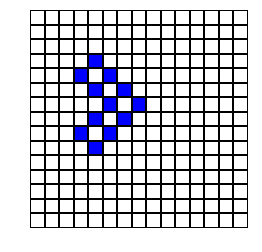

In [172]:
ev = evolucion(46, init) 
muestre(init)

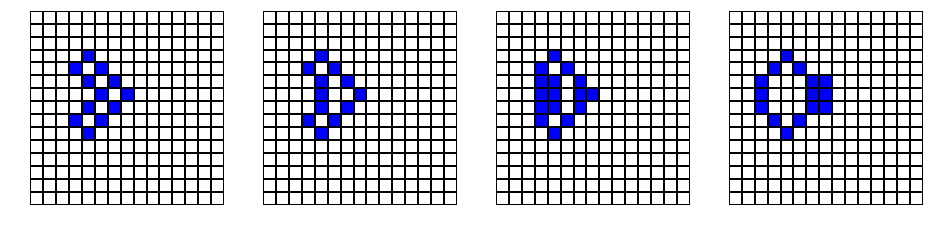

In [173]:
muestre4(ev[0], ev[1], ev[2], ev[3])

Figura 1. Cruz
init = np.zeros((15,15))
init[5,3] = 1
init[6,3] = 1
init[5,4] = 1
init[6,4] = 1
init[3,5] = 1
init[4,5] = 1
init[5,5] = 1
init[6,5] = 1
init[7,5] = 1
init[8,5] = 1
init[3,6] = 1
init[4,6] = 1
init[5,6] = 1
init[6,6] = 1
init[7,6] = 1
init[8,6] = 1
init[5,7] = 1
init[6,7] = 1
init[5,8] = 1
init[6,8] = 1

Figura 2. Cruz Pequeña
init = np.zeros((15,15))
init[5,4] = 1
init[6,4] = 1
init[4,5] = 1
init[5,5] = 1
init[6,5] = 1
init[7,5] = 1
init[4,6] = 1
init[5,6] = 1
init[6,6] = 1
init[7,6] = 1
init[5,7] = 1
init[6,7] = 1

Figura 3. Cara
init = np.zeros(15,15))
init[5,4] = 1
init[6,4] = 1
init[4,5] = 1
init[5,5] = 1
init[6,5] = 1
init[7,5] = 1
init[3,6] = 1
init[4,6] = 1
init[5,6] = 1
init[7,6] = 1
init[8.6] = 1
init[4,7] = 1
init[5,7] = 1
init[6,7] = 1
init[7,7] = 1

Figura 4. L.
init = np.zeros((15,15))
init[4,3] = 1
init[5,3] = 1
init[4,4] = 1
init[5,4] = 1
init[4,5] = 1
init[5,5] = 1
init[4,6] = 1
init[5,6] = 1
init[4,7] = 1
init[5,7] = 1
init[6,7] = 1
init[7,7] = 1
init[4,8] = 1
init[5,8] = 1
init[6,8] = 1
init[7,8] = 1

Figura 5. =
init = np.zeros((15,15))
init[3,4] = 1
init[4,3] = 1
init[5,4] = 1
init[4,5] = 1
init[6,5] = 1
init[5,6] = 1
init[7,6] = 1
init[6,7] = 1
init[8,7] = 1
init[7,8] = 1

Figura 6. Micro
init = np.zeros((15,15))
init[4,3] = 1
init[8,3] = 1
init[3,4] = 1
init[5,4] = 1
init[7,4] = 1
init[9,4] = 1
init[4,5] = 1
init[6,5] = 1
init[8,5] = 1
init[5,6] = 1
init[7,6] = 1
init[6,7] = 1

## Resultados Esperados del simulador 

Se prevee que el simulador se ejecute según las iteracciones que se desee visualizar.

## Plan de experimentación 

Según las celulas que se tiene y el numero de iteracciones que se va a relizar. Con el objetivo de ver el numero de celulas vivas que quedan al final de las itecciones

## Tiempo disponible 

1 semana

## Variables de interés 

- Número de itecciones 
- Número celulas muertas
- Número de celulas vivas

## Bibliografía 

Frittelli, V., Tartabini, M., Teicher, R., Steffolani, F., Serrano, D., Fernández, J., ... & Strub, A. (2013). Desarrollo de Juegos como Estrategia Didáctica en la Enseñanza de la Programación. CONAIISI 2013.

Extraído de: https://boriel.com/es/lab/el-juego-de-la-vida-de-conway/